In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from scipy.stats import mode
import statsmodels.api as sm

In [20]:
data = pd.read_csv("OnlineNewsPopularity-MinusURL1.csv")
data.head(3)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,422,8,261,0.571429,1.0,0.595628,24,5,18,1,...,0.100000,1.0,-0.143750,-0.187500,-0.100,0.000000,0.000000,0.500000,0.000000,441000
1,359,9,192,0.647368,1.0,0.754098,7,4,0,2,...,0.136364,1.0,-0.246759,-0.500000,-0.100,0.454545,0.136364,0.045455,0.136364,310800
2,651,10,905,0.460067,1.0,0.645161,3,2,21,0,...,0.033333,1.0,-0.224913,-0.666667,-0.125,0.000000,0.000000,0.500000,0.000000,306100


In [54]:
data['high_shares']=np.where(data['shares']>4000, 1, 0)
data['med_shares']=np.where(data['shares']<3999, 1, 0) & np.where(data['shares']>1500, 1, 0)
data['low_shares']=np.where(data['shares']<1499,  1, 0)
data.sample(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares,med_shares,low_shares,share_cat
21018,57,13,336,0.570552,1.0,0.728261,6,1,1,0,...,-0.125000,0.000000,0.000000,0.500000,0.000000,1400,0,0,1,0
31558,26,9,308,0.592715,1.0,0.707921,9,4,1,0,...,-0.125000,0.454545,0.136364,0.045455,0.136364,877,0,0,1,0
18253,722,9,342,0.586103,1.0,0.750000,2,1,1,0,...,-0.075000,0.183333,0.133333,0.316667,0.133333,1500,0,0,0,0
11209,163,9,254,0.578740,1.0,0.756757,3,1,1,0,...,-0.033333,0.200000,0.100000,0.300000,0.100000,2500,0,1,0,0
6013,695,10,223,0.677419,1.0,0.833333,2,1,0,0,...,-0.050000,0.000000,0.000000,0.500000,0.000000,4300,1,0,0,0
28002,189,12,313,0.641196,1.0,0.786096,11,3,0,1,...,-0.100000,0.975000,-0.100000,0.475000,0.100000,1000,0,0,1,0
5926,388,10,315,0.590164,1.0,0.760000,5,4,1,0,...,-0.050000,0.000000,0.000000,0.500000,0.000000,4400,1,0,0,0
38638,206,15,733,0.526389,1.0,0.726437,6,4,1,2,...,-0.125000,0.300000,1.000000,0.200000,1.000000,491,0,0,1,0
31448,548,8,496,0.534836,1.0,0.695652,6,3,1,0,...,-0.050000,0.000000,0.000000,0.500000,0.000000,880,0,0,1,0
451,584,11,1283,0.291461,1.0,0.317339,53,5,60,0,...,-0.125000,0.200000,-0.200000,0.300000,0.200000,28600,1,0,0,0


In [4]:
cols=['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',	'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', ' weekday_is_monday',	'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',	'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',	'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',	'min_negative_polarity', 'max_negative_polarity',
      'title_subjectivity',	'title_sentiment_polarity',	'abs_title_subjectivity', 'abs_title_sentiment_polarity']
X=data[cols]
Y=data['high_shares']

In [5]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.420852
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            high_shares   No. Observations:                39639
Model:                          Logit   Df Residuals:                    39582
Method:                           MLE   Df Model:                           56
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:                 0.06999
Time:                        00:30:18   Log-Likelihood:                -16682.
converged:                      False   LL-Null:                       -17938.
                                        LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                         0.0007   9.63e-05      7.627      0.000       0.001       0.001
n_tokens

/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
data.drop(' weekday_is_monday', axis=1)
data.drop('weekday_is_tuesday', axis=1)
data.drop('weekday_is_wednesday', axis=1)
data.drop('weekday_is_thursday', axis=1)
data.drop('weekday_is_friday', axis=1)
data.drop('is_weekend', axis=1)
data.drop('weekday_is_saturday', axis=1)
data.drop('weekday_is_sunday', axis=1)
data.drop('data_channel_is_tech', axis=1)
data.drop('data_channel_is_world', axis=1)
data.drop('kw_min_max', axis=1)
data.drop('kw_max_max', axis=1)
data.drop('n_unique_tokens', axis=1)
data.drop('n_non_stop_words', axis=1)
data.drop('n_non_stop_unique_tokens', axis=1)
data.drop('self_reference_min_shares', axis=1)
data.drop('self_reference_max_shares', axis=1)
data.drop('self_reference_avg_sharess', axis=1)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares
0,422,8,261,0.571429,1.0,0.595628,24,5,18,1,...,1.000000,-0.143750,-0.187500,-0.100000,0.000000,0.000000,0.500000,0.000000,441000,1
1,359,9,192,0.647368,1.0,0.754098,7,4,0,2,...,1.000000,-0.246759,-0.500000,-0.100000,0.454545,0.136364,0.045455,0.136364,310800,1
2,651,10,905,0.460067,1.0,0.645161,3,2,21,0,...,1.000000,-0.224913,-0.666667,-0.125000,0.000000,0.000000,0.500000,0.000000,306100,1
3,420,12,198,0.556122,1.0,0.634921,15,1,14,1,...,0.700000,-0.462500,-1.000000,-0.125000,0.700000,-0.450000,0.200000,0.450000,298400,1
4,77,14,138,0.613139,1.0,0.720930,3,3,0,1,...,0.500000,-0.433333,-0.433333,-0.433333,0.451515,0.245455,0.048485,0.245455,284700,1
5,447,10,390,0.604839,1.0,0.662207,20,3,0,16,...,1.000000,-0.396875,-0.500000,-0.187500,0.000000,0.000000,0.500000,0.000000,233400,1
6,679,11,506,0.565844,1.0,0.672956,28,6,1,0,...,1.000000,-0.422500,-1.000000,-0.125000,0.600000,-0.400000,0.100000,0.400000,227300,1
7,44,16,0,0.000000,0.0,0.000000,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,211600,1
8,545,11,3815,0.264598,1.0,0.447094,2,0,1,0,...,0.900000,-0.288177,-1.000000,-0.050000,0.125000,0.000000,0.375000,0.000000,210300,1
9,366,9,352,0.616071,1.0,0.785000,15,1,11,0,...,0.500000,-0.394841,-1.000000,-0.187500,0.000000,0.000000,0.500000,0.000000,208300,1


In [ ]:
# Melt DataFrame
melted_df = pd.melt(data, 
                    id_vars=["shares", "high_shares"], # Variables to keep
                    var_name="attribute") # Name of melted variable
melted_df.sample(30)

,shares,high_shares,attribute,value
1977261,740,0,avg_positive_polarity,0.209091
1832875,2900,0,global_rate_negative_words,0.015766
2397285,1500,0,low_shares,0.000000
2055975,764,0,max_positive_polarity,1.000000
19124,1500,0,timedelta,213.000000
1282268,2000,0,weekday_is_wednesday,1.000000
1013208,1300,0,kw_max_avg,37188.888890
2096295,734,0,avg_negative_polarity,0.000000
927297,1800,0,kw_avg_max,341766.666700
2184693,5500,1,title_subjectivity,0.000000


In [56]:
# Melt DataFrame
melted_df1 = pd.melt(data, 
                    id_vars=["high_shares", "med_shares", "low_shares", "shares"], # Variables to keep
                    var_name="attribute") # Name of melted variable
melted_df1.sample(30)

,high_shares,med_shares,low_shares,shares,attribute,value
1961324,0,0,0,1500,avg_positive_polarity,0.364489
2151722,0,1,0,2500,max_negative_polarity,-0.050000
757582,1,0,0,5700,kw_max_min,973.000000
1203042,0,1,0,2000,weekday_is_monday,1.000000
2226403,0,0,0,4000,title_sentiment_polarity,-0.375000
759862,0,1,0,3900,kw_max_min,846.000000
316492,0,0,1,436,num_self_hrefs,5.000000
1499419,0,0,1,829,is_weekend,0.000000
47778,0,1,0,3300,n_tokens_title,12.000000
85321,1,0,0,4300,n_tokens_content,493.000000


In [8]:
pkmn_type_colors = ['#78C850',  # n_non_stop_words
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8']


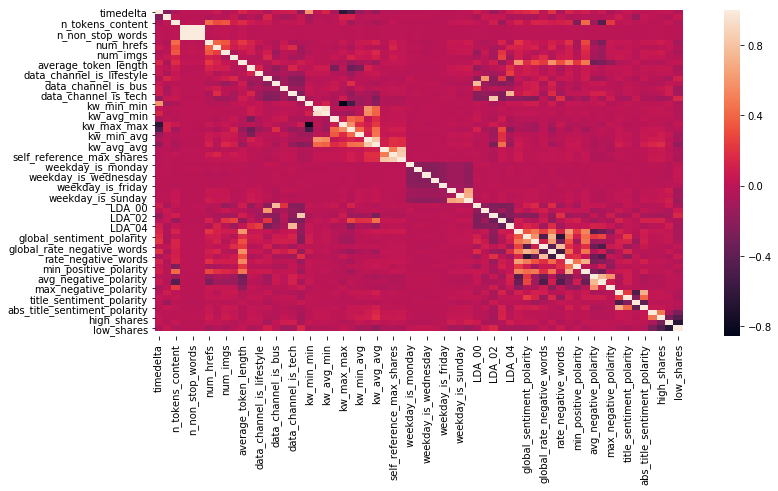

In [58]:
# Calculate correlations
plt.figure(figsize=(12,6))
corr = data.corr()
 
# Heatmap
sns.heatmap(corr)

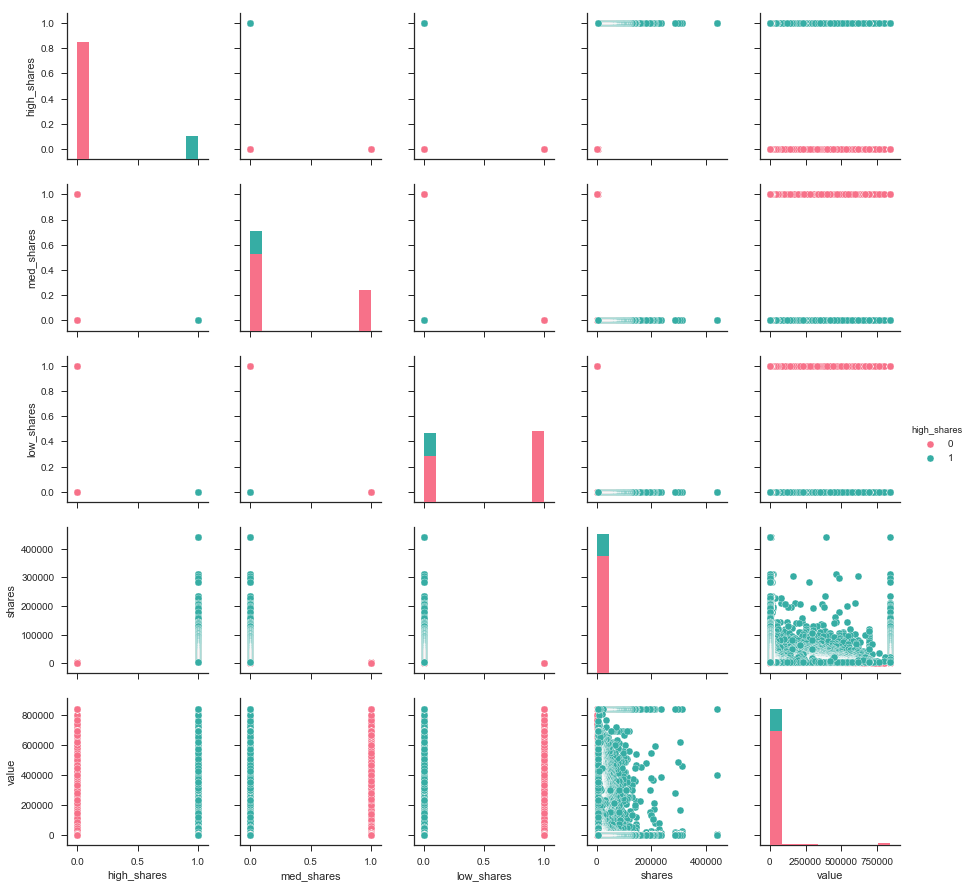

In [62]:
g = sns.pairplot(melted_df1, hue="high_shares", palette="husl")

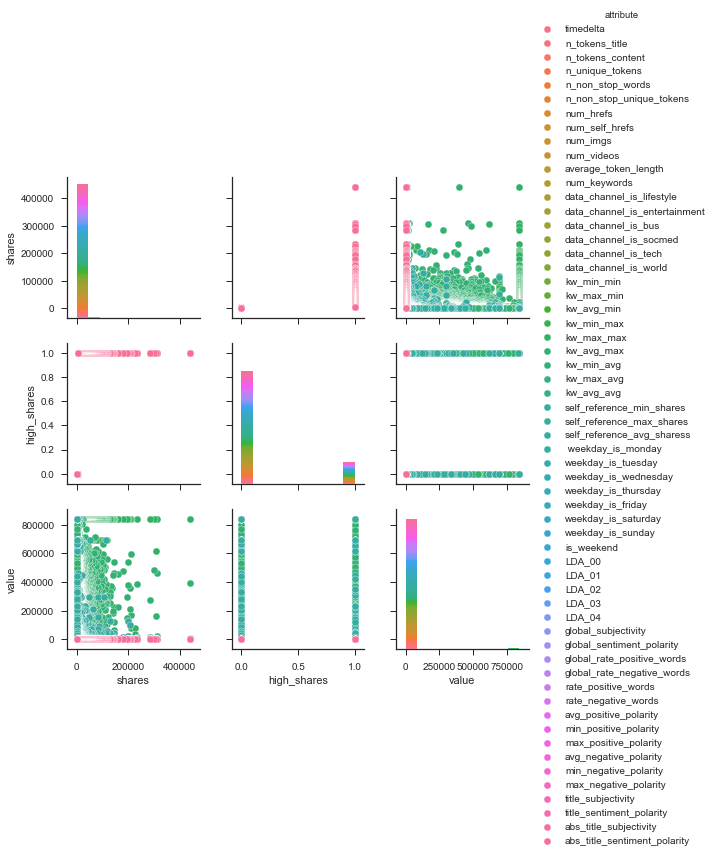

In [65]:
sns.set(style="ticks")

sns.pairplot(melted_df, hue="high_shares", palette='husl')

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="ticks")

sns.pairplot(data, hue="high_shares", palette='husl')

KeyboardInterrupt: 